## Linear Regression Analysis

In this notebook, we perform a linear regression analysis on a given set of data points. The goal is to find the best fit line that represents the relationship between the independent variable `xs` and the dependent variable `ys`.

### Steps:
1. **Scatter Plot**: Visualize the data points using a scatter plot.
2. **Best Fit Line Calculation**: Calculate the slope (`m`) and intercept (`b`) of the best fit line using the least squares method.
3. **Plot Best Fit Line**: Plot the best fit line along with the original data points.
4. **Prediction**: Use the regression line equation to predict the value of `y` for a given `x`.

### Variables:
- `xs`: Independent variable values (numpy array)
- `ys`: Dependent variable values (numpy array)
- `m`: Slope of the best fit line (numpy.float64)
- `b`: Intercept of the best fit line (numpy.float64)
- `regression_line`: List of predicted `y` values for each `x` in `xs`
- `predict_x`: The `x` value for which we want to predict the `y` value
- `predict_y`: The predicted `y` value for `predict_x`

In [152]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import random

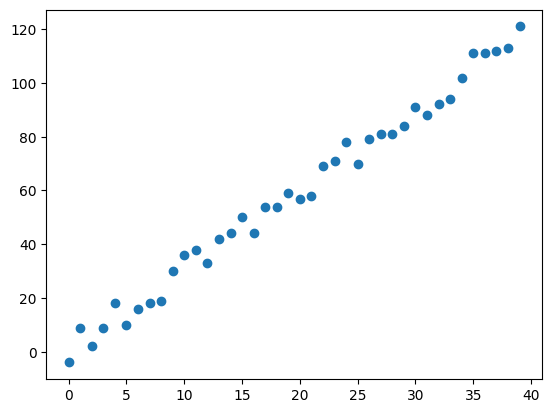

In [153]:
# xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=np.float64)
# ys = np.array([2, 3, 8, 1, 6, 7, 10, 5, 14, 9, 12, 11, 18, 13, 20, 15, 22, 17, 24, 19], dtype=np.float64)

def create_dataset( hm , variance , step=2 , corelation=False):
    val = 1
    ys = [] 
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if corelation and corelation == 'pos':
            val += step
        elif corelation and corelation == 'neg':
            val -= step 
    xs = [i for i in range (len(ys))]
    
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)

xs , ys = create_dataset(40, 6, 3, corelation='pos')
plt.scatter(xs, ys)
plt.show()

In [154]:
def best_fit_slope_and_intercept(xs, ys):
    # Calculate the slope (m) using the least squares method
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs)**2 - mean(xs**2))
    
    # Calculate the intercept (b) using the mean values and the slope
    b = mean(ys) - m * mean(xs)
    
    return m, b

# Print the calculated slope and intercept
print(best_fit_slope_and_intercept(xs, ys))

(np.float64(2.99906191369606), np.float64(0.11829268292683537))


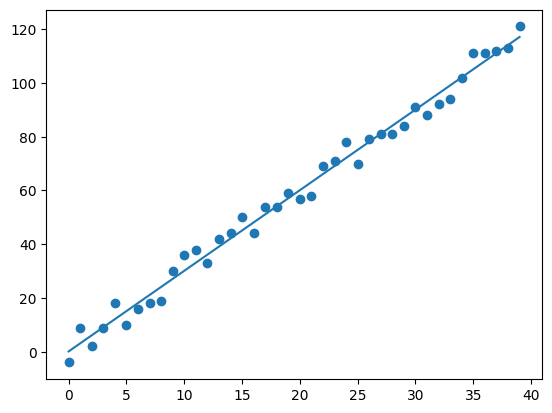

In [155]:
# Calculate the slope (m) and intercept (b) for the best fit line
m, b = best_fit_slope_and_intercept(xs, ys)

# Calculate the regression line for all xs values
regression_line = [(m * x) + b for x in xs]

# Plot the original data points
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

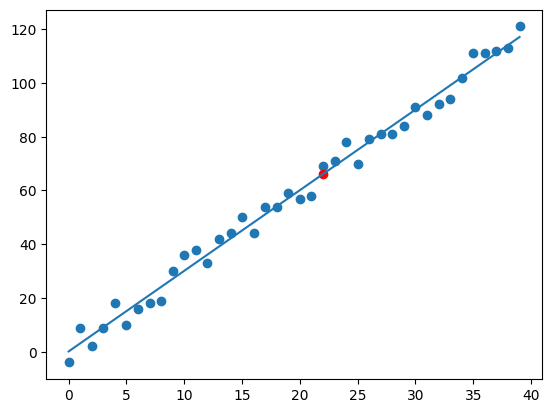

In [156]:
# Define the x value for prediction
predict_x = 22

# Calculate the corresponding y value using the regression line equation
predict_y = (m * predict_x) + b

# Plot the original data points
plt.scatter(xs, ys)

# Plot the regression line
plt.plot(xs, regression_line)

# Highlight the predicted point in red
plt.scatter(predict_x, predict_y, color='r')

# Display the plot
plt.show()


### Error Calculation in Linear Regression

In linear regression, the error (or residual) is the difference between the actual value (`ys`) and the predicted value (`regression_line`). One common way to measure the overall error of the regression model is by calculating the **Mean Squared Error (MSE)**. The MSE is the average of the squared differences between the actual and predicted values.

#### Mean Squared Error (MSE)

The formula for MSE is:

MSE = (1/n) * Σ(yi - ŷi)²

Where:

yi is the actual value of the i-th data point.
ŷi is the predicted value of the i-th data point. 
n is the total number of data points.   
Σ represents the sum of all the squared differences.


In our case:
- `ys` contains the actual values.
- `regression_line` contains the predicted values.

#### Steps to Calculate MSE:
1. Calculate the difference between each actual value and the corresponding predicted value.
2. Square each difference.
3. Sum all the squared differences.
4. Divide the sum by the number of data points.

By calculating the MSE, we can quantify how well the regression line fits the data. A lower MSE indicates a better fit.
```

In [157]:
def calculate_mse(ys, regression_line):
    # Calculate the squared error for each data point
    squared_errors = (ys - regression_line) ** 2
    
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean(squared_errors)
    
    return squared_errors, mse

# Call the function and print the results
squared_errors, mse = calculate_mse(ys, regression_line)
print(squared_errors)
print("Mean Squared Error:", mse)

[1.69603346e+01 3.46055169e+01 1.69448849e+01 1.33352664e-02
 3.46386354e+01 2.61489280e+01 4.46334987e+00 9.68283919e+00
 2.61201539e+01 8.35296756e+00 3.47049199e+01 2.39319210e+01
 9.65367051e+00 8.37467133e+00 3.59042062e+00 2.39686482e+01
 1.68369339e+01 8.39640325e+00 1.02834059e-02 3.60821786e+00
 9.60709215e+00 2.59956493e+01 8.42360775e+00 3.62248733e+00
 3.48598302e+01 2.59574000e+01 8.21012790e-01 8.64237088e-03
 9.56062643e+00 9.55482614e+00 8.27826852e-01 2.59000789e+01
 1.67139837e+01 2.58809859e+01 7.46457096e-03 3.49817874e+01
 8.50001444e+00 8.39819220e-01 1.17212107e+00 1.53530175e+01]
Mean Squared Error: 14.239882739212012


The coefficient of determination (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable that can be explained by the independent variable(s) in a regression model.

In simpler terms:

Imagine you're trying to predict how tall someone will be based on their parent's heights. You build a model (your linear regression line). R-squared tells you how much of the variation in people's heights you can explain using your model (parent's heights).

### Key Points:

- **Range**: R-squared values range from 0 to 1.
- **R-squared of 1**: Indicates a perfect fit; the model explains all the variability in the data.
- **R-squared of 0**: Indicates the model explains none of the variability.

### Interpretation:

A higher R-squared generally indicates a better fit of the model to the data. However, it's important to remember that a high R-squared doesn't necessarily mean the model is a good predictor of future outcomes.

### Example:

If your model has an R-squared of 0.75, it means that 75% of the variation in the dependent variable can be explained by the independent variable(s) in your model.

### Formula:



R² = 1 - (Σ(yi - ŷi)² / Σ(yi - ȳ)²)

Breakdown:

R²: Represents the coefficient of determination.

yi: The actual value of the dependent variable for the i-th data point.

ŷi: The predicted value of the dependent variable for the i-th data point, as estimated by the regression model.

ȳ: The mean (average) of all the actual values of the dependent variable.

Σ: Represents the sum of all the values.

In simpler terms:

Numerator (Σ(yi - ŷi)²):

Calculates the sum of the squared differences between the actual values (yi) and the predicted values (ŷi) by the model.
This represents the unexplained variance – the portion of the data's variability that the model cannot account for.


Denominator (Σ(yi - ȳ)²):

Calculates the sum of the squared differences between each actual value (yi) and the mean of all the actual values (ȳ).
This represents the total variance in the data.
In essence, R-squared provides a measure of how well your regression model fits the observed data and how effectively it can explain the relationship between the variables.

In [158]:
def calculate_r_squared(ys, regression_line):
    # Calculate the mean of the actual values
    mean_ys = np.mean(ys)

    # Calculate the total sum of squares (SST)
    sst = np.sum((ys - mean_ys) ** 2)

    # Calculate the sum of squares of residuals (SSR)
    ssr = np.sum((ys - regression_line) ** 2)

    # Calculate the coefficient of determination (R-squared)
    r_squared = 1 - (ssr / sst)

    return r_squared

# Call the function and print the R-squared value
r_squared = calculate_r_squared(ys, regression_line)
print("R-squared:", r_squared)

R-squared: 0.9882580909847024


### Understanding R-squared and Mean Squared Error (MSE)

Think of it like this:

Imagine you're trying to predict how tall someone will be based on their parent's heights. You build a model (your linear regression line).

#### R-squared

R-squared tells you how much of the variation in people's heights you can explain using your model (parent's heights).

- If R-squared is high (close to 1), your model explains a lot of the differences in people's heights.
- If R-squared is low (close to 0), your model doesn't explain much, and other factors are more important.

#### Mean Squared Error (MSE)

MSE measures how far off your model's predictions are from the actual heights.

- A low MSE means your predictions are generally very close to the real heights.
- A high MSE means your predictions are often quite different from reality.

#### Key Differences

- **R-squared**: Focuses on how well your model explains the overall pattern.
- **MSE**: Focuses on how accurate the specific predictions are.

In simpler terms:

- **R-squared**: Tells you how good your model is at explaining the big picture.
- **MSE**: Tells you how good your model is at making specific predictions.

Think of it like this:

- **R-squared**: "Your model explains 80% of the variation in heights."
- **MSE**: "On average, your model's predictions are off by 2 inches."